# ***TASK - 01***

In [3]:
import pandas as pd
data =pd.read_csv('heart.csv')
data.head()
x = data.drop('target', axis = 1)
y = data['target']
x.head()
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [5]:
from collections import Counter
print(Counter(data['target']))
# the dataset is balanced

Counter({1: 526, 0: 499})


In [8]:
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
print(data.duplicated().sum())

723


In [11]:
print(data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [10]:

print(data.select_dtypes(include = ["object"]).columns)

Index([], dtype='object')


since, there are no empty and categorical variables but many duplicate rows, handle the, by dropping

In [14]:
data = data.drop_duplicates()
data
data.shape

(302, 14)

dropped the duplicates to avoid bias

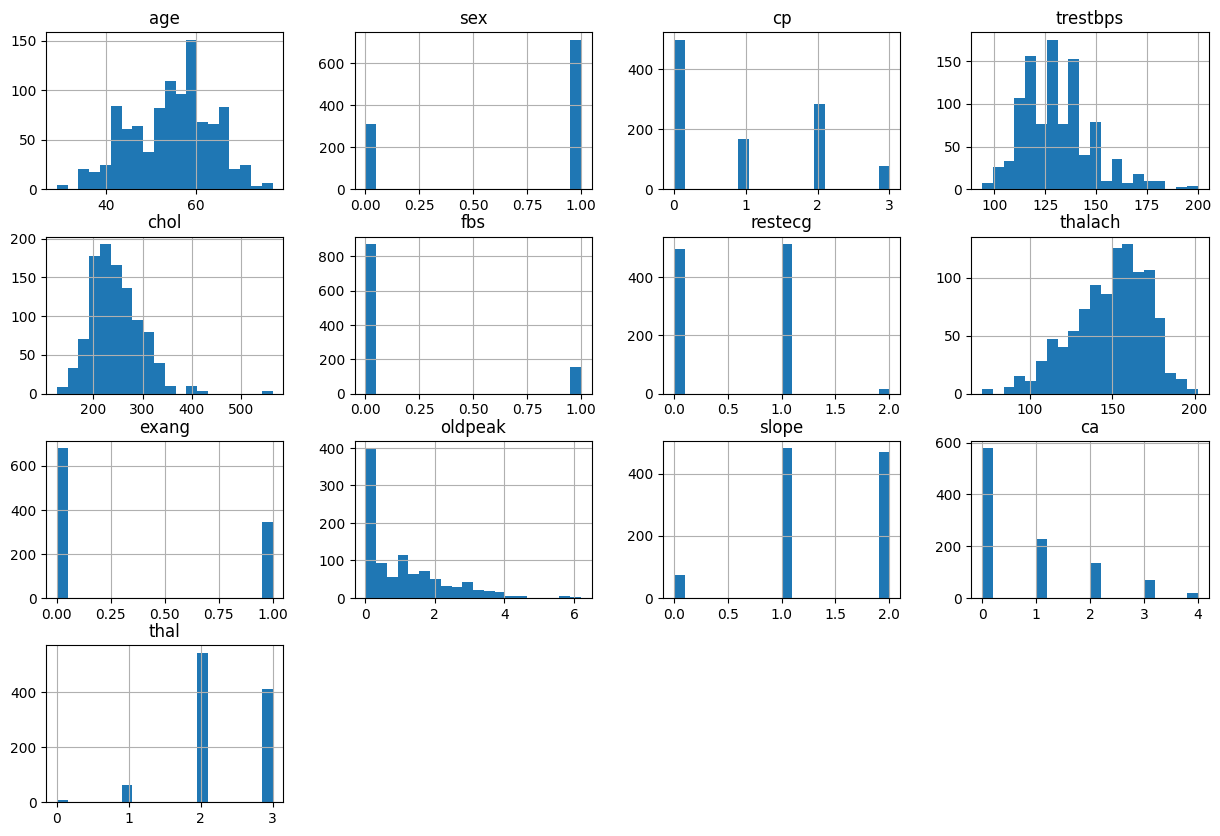

In [15]:
# scaling in case we used distance based model a a base model(KNN)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
x.hist(bins=20, figsize=(15,10))
plt.show()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=0
)

# Second split: train and validation from train_val
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.3, random_state=0
)

print("Training set:", x_train.shape)
print("Validation set:", x_val.shape)
print("Testing set:", x_test.shape)


Training set: (574, 13)
Validation set: (246, 13)
Testing set: (205, 13)


Validation set is used to tune hyperparameters and avoid overfitting before testing on unseen data.

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [19]:
rf = RandomForestClassifier(random_state = 0)
xgb = XGBClassifier()
ada = AdaBoostClassifier(random_state = 0)

In [20]:
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)
ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=0)

In [21]:
y_train_rf = rf.predict(x_train)
y_test_rf = rf.predict(x_test)

y_train_xgb = xgb.predict(x_train)
y_test_xgb = xgb.predict(x_test)

y_train_ada = ada.predict(x_train)
y_test_ada = ada.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

# Random Forest
print("Random Forest:")
print("  Training Accuracy:", accuracy_score(y_train, y_train_rf))
print("  Testing Accuracy: ", accuracy_score(y_test, y_test_rf))
# XGBoost
print("XGBoost:")
print("  Training Accuracy:", accuracy_score(y_train, y_train_xgb))
print("  Testing Accuracy: ", accuracy_score(y_test, y_test_xgb))
# AdaBoost
print("AdaBoost:")
print("  Training Accuracy:", accuracy_score(y_train, y_train_ada))
print("  Testing Accuracy: ", accuracy_score(y_test, y_test_ada))


Random Forest:
  Training Accuracy: 1.0
  Testing Accuracy:  0.9853658536585366
XGBoost:
  Training Accuracy: 1.0
  Testing Accuracy:  0.9902439024390244
AdaBoost:
  Training Accuracy: 0.8972125435540069
  Testing Accuracy:  0.9073170731707317


# ***TASK - 02***

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:16:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:16:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy (Hard Voting): 0.7804878048780488
Accuracy (Soft Voting): 0.7707317073170732
Hard Voting gave the maximum accuracy.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:16:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:16:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:16:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:16:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:16:07] WARNING: /w

Best Weights: DT=1, KNN=1, RF=3, XGB=3
Best Accuracy: 78.54%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


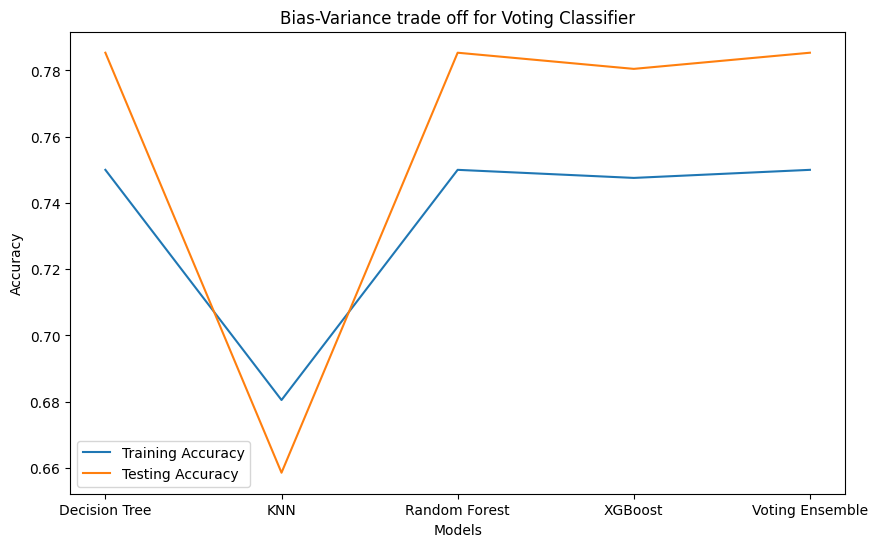

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:17:16] WARNING: /w

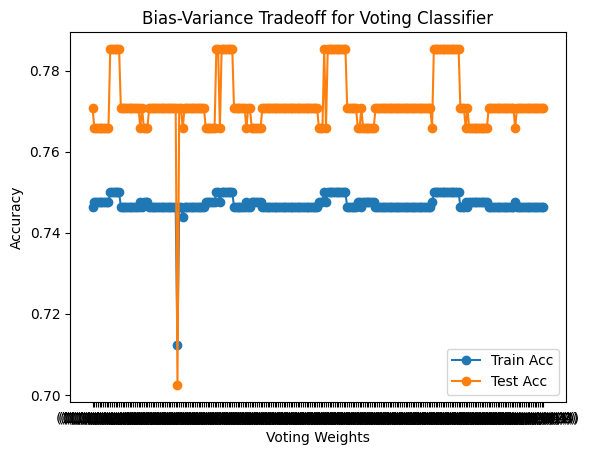

In [29]:
# -------------------------
# Task 2: Voting Classifier with Two Features
# -------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from itertools import product

# -------------------------
# Step 1: Load Dataset
# -------------------------
df = pd.read_csv("heart.csv")

# Extract only two features
X = df[['restecg', 'oldpeak']]
y = df['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# -------------------------
# Step 2: Define Base Models
# -------------------------
DT = DecisionTreeClassifier(random_state=0)
KNN = KNeighborsClassifier()
RF = RandomForestClassifier(random_state=0)
XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# -------------------------
# Step 3: Voting Classifiers
# -------------------------
voting_hard = VotingClassifier(
    estimators=[('DT', DT), ('KNN', KNN), ('RF', RF), ('XGB', XGB)],
    voting='hard'
)

voting_soft = VotingClassifier(
    estimators=[('DT', DT), ('KNN', KNN), ('RF', RF), ('XGB', XGB)],
    voting='soft'
)

voting_hard.fit(x_train, y_train)
voting_soft.fit(x_train, y_train)

# Predictions
y_pred_hard = voting_hard.predict(x_test)
y_pred_soft = voting_soft.predict(x_test)

# Accuracy
acc_hard = accuracy_score(y_test, y_pred_hard)
acc_soft = accuracy_score(y_test, y_pred_soft)

print("Accuracy (Hard Voting):", acc_hard)
print("Accuracy (Soft Voting):", acc_soft)

# Determine which gave maximum accuracy
if acc_hard > acc_soft:
    print("Hard Voting gave the maximum accuracy.")
elif acc_soft > acc_hard:
    print("Soft Voting gave the maximum accuracy.")
else:
    print("Both Hard and Soft Voting gave the same accuracy.")

# -------------------------
# Step 4: Find Best Weights for Soft Voting
# -------------------------
weight_options = [1, 2, 3, 4]
best_acc = 0

for weight in product(weight_options, repeat=4):
    vc = VotingClassifier(
        estimators=[('DT', DT), ('KNN', KNN), ('RF', RF), ('XGB', XGB)],
        voting='soft',
        weights=weight
    )
    vc.fit(x_train, y_train)
    y_pred = vc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_acc:
        best_acc = acc
        best_weights = weight

print(f"Best Weights: DT={best_weights[0]}, KNN={best_weights[1]}, RF={best_weights[2]}, XGB={best_weights[3]}")
print(f"Best Accuracy: {best_acc*100:.2f}%")

models = {
    "Decision Tree":DT,
    "KNN": KNN,
    "Random Forest": RF,
    "XGBoost": XGB,
    "Voting Ensemble": VotingClassifier(
        estimators = [('DT', DT), ('KNN', KNN), ('RF', RF), ('XGB', XGB)],
        voting = 'soft',
        weights = [best_weights[0], best_weights[1], best_weights[2], best_weights[3]]
    )
}

train_acc = []
test_acc = []

for name, model in models.items():
  model.fit(x_train, y_train)
  train_acc.append(accuracy_score(y_train, model.predict(x_train)))
  test_acc.append(accuracy_score(y_test, model.predict(x_test)))
plt.figure(figsize = (10, 6))
plt.plot(list(models.keys()), train_acc, label = 'Training Accuracy')
plt.plot(list(models.keys()), test_acc, label = 'Testing Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Bias-Variance trade off for Voting Classifier")
plt.legend()
plt.show()

train_acc = []
test_acc = []


for weight in product([1,2,3,4], repeat = 4):
    vc = VotingClassifier(
        estimators=[('DT', DT), ('KNN', KNN), ('RF', RF), ('XGB', XGB)],
        voting='soft',
        weights=weight
    )
    vc.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, vc.predict(x_train)))
    test_acc.append(accuracy_score(y_test, vc.predict(x_test)))

plt.plot([str(w) for w in product([1,2,3,4], repeat = 4)], train_acc, label='Train Acc', marker='o')
plt.plot([str(w) for w in product([1,2,3,4], repeat = 4)], test_acc, label='Test Acc', marker='o')
plt.xlabel("Voting Weights")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff for Voting Classifier")
plt.legend()
plt.show()

# **TASK - 05**

In [36]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

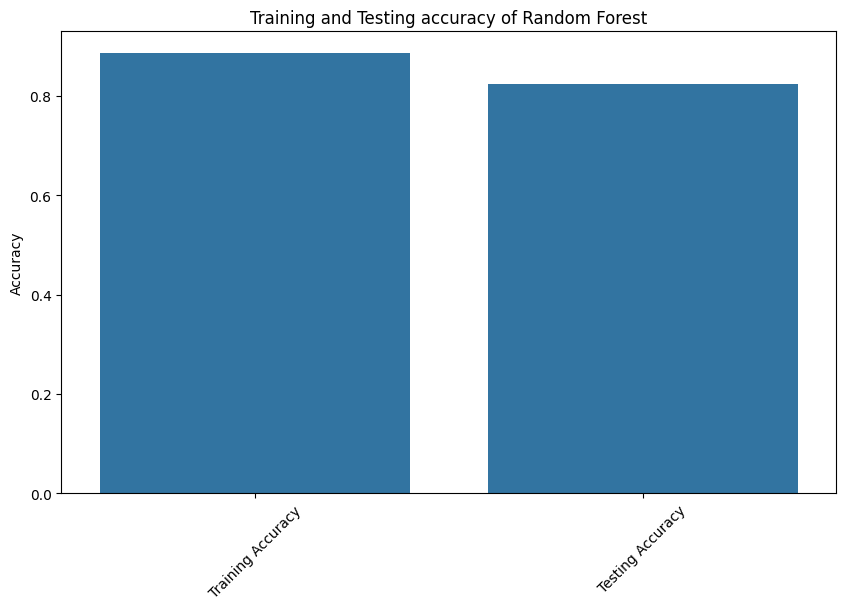

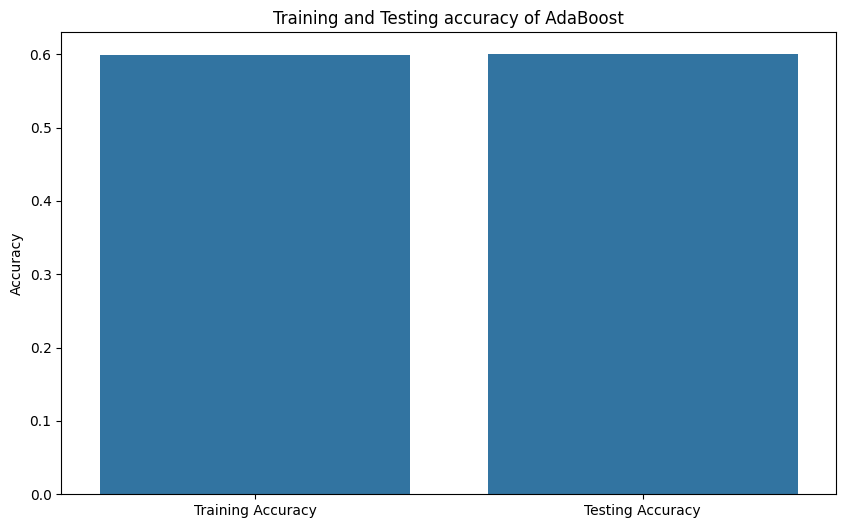

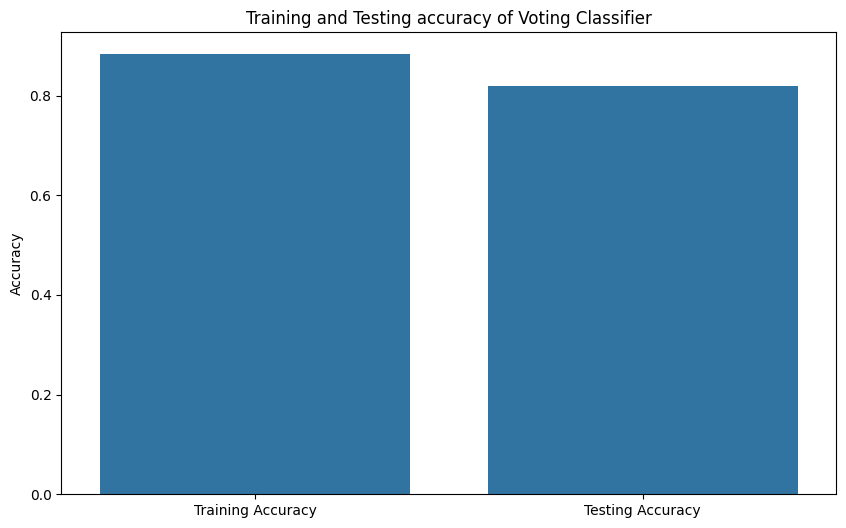

In [39]:
df = pd.read_csv('heart.csv')
x= df[['restecg', 'chol']]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

rf = RandomForestClassifier()
ada = AdaBoostClassifier()
voting = VotingClassifier(estimators = [('rf', rf), ('ada', ada)], voting = 'soft')

rf.fit(x_train, y_train)
ada.fit(x_train, y_train)
voting.fit(x_train, y_train)

train_acc_rf = accuracy_score(y_train, rf.predict(x_train))
test_acc_rf = accuracy_score(y_test, rf.predict(x_test))

train_acc_ada = accuracy_score(y_train, ada.predict(x_train))
test_acc_ada = accuracy_score(y_test, ada.predict(x_test))

train_acc_v = accuracy_score(y_train, voting.predict(x_train))
test_acc_v = accuracy_score(y_test, voting.predict(x_test))

rf_acc = [train_acc_rf, test_acc_rf]
rf_values = ['Training Accuracy', 'Testing Accuracy']

ada_acc = [train_acc_ada, test_acc_ada]
ada_values = ['Training Accuracy', 'Testing Accuracy']

v_acc = [train_acc_v, test_acc_v]
v_values = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize = (10, 6))
sns.barplot(x = rf_values, y = rf_acc)
plt.ylabel("Accuracy")
plt.title("Training and Testing accuracy of Random Forest")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x = ada_values, y = ada_acc)
plt.ylabel("Accuracy")
plt.title("Training and Testing accuracy of AdaBoost")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x = v_values, y = v_acc)
plt.ylabel("Accuracy")
plt.title("Training and Testing accuracy of Voting Classifier")
plt.show()